# Basic setup

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os, glob
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import nltools.stats as nlstats
from nltools.stats import downsample
import scipy.signal as signal
from scipy.signal import butter, lfilter, freqz, filtfilt
from scipy.spatial import distance
from scipy import stats
from natsort import natsorted, ns
from pymer4.models import Lmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
%load_ext rpy2.ipython

fpath = 'where/you/have/the/data'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
%%R
library('sjPlot')
library('lme4')
library('lmerTest')
library('lsmeans')

# Patient - Interaction - SCR AUC

In [15]:
patgsr_auc_dat = pd.read_csv(os.path.join(fpath,'study3_pat_interaction_scr_auc_data.csv'))

In [16]:
patgsr_auc_mean = patgsr_auc_dat.groupby(['DyadID','Condition'])['auc'].mean().reset_index()

## Extended Data Figure 7(B)

/Users/PinhaoChen/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


[Text(0, 0, 'Control'), Text(1, 0, 'Thermedol')]

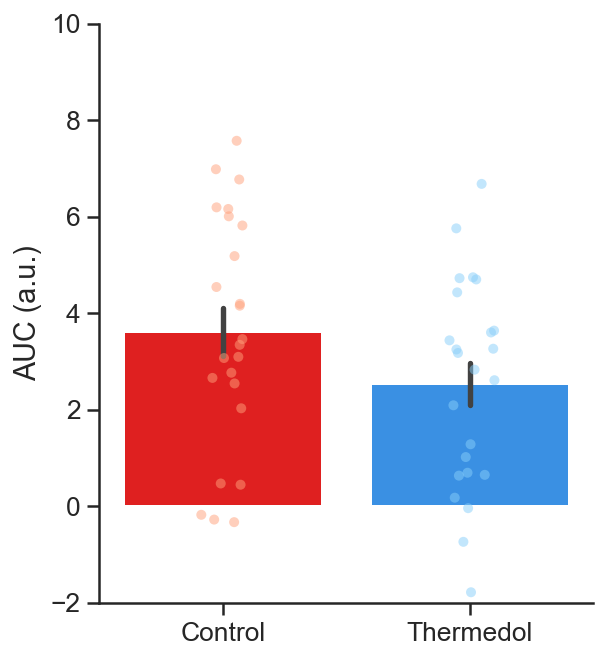

In [11]:
sns.set(style="ticks", font_scale=1.2)
g = sns.factorplot(x="Condition", y="auc"
    , palette={'Thermedol':'dodgerblue','Vaseline':'red'},units='DyadID',n_boot=5000, 
    ci=68, data=patgsr_auc_mean, kind="bar", order=['Vaseline','Thermedol'], aspect=0.9)

g = sns.stripplot(x="Condition", y="auc", 
    palette={'Thermedol':'lightskyblue','Vaseline':'lightsalmon'},
    data=patgsr_auc_mean, order=['Vaseline','Thermedol'],alpha=.5)

g.set(ylim=(-2, 10))
plt.ylabel('AUC (a.u.)')
plt.xlabel('')
g.set_xticklabels(["Control","Thermedol"])

In [19]:
%%R -i patgsr_auc_dat
patgsr_auc_dat$Site <- factor(patgsr_auc_dat$Site)
patgsr_auc_dat$Color <- factor(patgsr_auc_dat$Current_Color)
patgsr_auc_dat$Condition <- factor(patgsr_auc_dat$Condition_new)
patgsr_auc_model <- lmer(auc ~ Site + Color +Drift + trials_c + Condition + (1 + Drift +trials_c + Condition | DyadID)
                ,data = patgsr_auc_dat)
summary(patgsr_auc_model)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: auc ~ Site + Color + Drift + trials_c + Condition + (1 + Drift +  
    trials_c + Condition | DyadID)
   Data: patgsr_auc_dat

REML criterion at convergence: 5515.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1803 -0.6265 -0.1294  0.4837  3.7864 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr             
 DyadID   (Intercept) 2.179e+00 1.47626                   
          Drift       5.921e-04 0.02433   1.00            
          trials_c    9.943e-02 0.31533  -1.00 -1.00      
          Condition1  2.029e-01 0.45046  -1.00 -1.00  1.00
 Residual             7.921e+01 8.89998                   
Number of obs: 764, groups:  DyadID, 24

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   4.35014    0.88445 177.20000   4.918 1.98e-06 ***
Site2        -0.45323    0.91023 735.00000  -0.498   0.6187    